# Классификация клиентов банка - прогнозирование оттока

## Подключение модулей

In [1]:
# импортируем необходимые модули
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

## Загрузка данных

In [3]:
df = pd.read_csv('Churn_Modelling.csv', sep = ';')

In [4]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Описание данных

Признаки:
- RowNumber – индекс строки в данных
- CustomerId – уникальный идентификатор клиента
- Surname – фамилия
- CreditScore – кредитный рейтинг
- Geography – страна проживания
- Gender – пол
- Age – возраст
- Tenure – количество недвижимости у клиента
- Balance – баланс на счёте
- NumOfProducts -количество продуктов банка, используемых клиентом
- HasCrCard – наличие кредитной карты
- IsActiveMember – активность клиента
- EstimatedSalary – предполагаемая зарплата

Целевой (искомый) признак:
- Exited – факт ухода клиента

## Разведочный анализ данных

In [5]:
# объём данных
df.shape

(10000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x: '%0.4f' % x)

In [10]:
# описательная статистика для всех числовых признаков
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000
mean,5000.5000,15690940.5694,650.5288,38.9218,5.0128,76485.8893,1.5302,0.7055,0.5151,100090.2399,0.2037
std,2886.8957,71936.1861,96.6533,10.4878,2.8922,62397.4052,0.5817,0.4558,0.4998,57510.4928,0.4028
min,1.0000,15565701.0000,350.0000,18.0000,0.0000,0.0000,1.0000,0.0000,0.0000,11.5800,0.0000
25%,2500.7500,15628528.2500,584.0000,32.0000,3.0000,0.0000,1.0000,0.0000,0.0000,51002.1100,0.0000
50%,5000.5000,15690738.0000,652.0000,37.0000,5.0000,97198.5400,1.0000,1.0000,1.0000,100193.9150,0.0000
75%,7500.2500,15753233.7500,718.0000,44.0000,7.0000,127644.2400,2.0000,1.0000,1.0000,149388.2475,0.0000
max,10000.0000,15815690.0000,850.0000,92.0000,10.0000,250898.0900,4.0000,1.0000,1.0000,199992.4800,1.0000


### Визуальный анализ

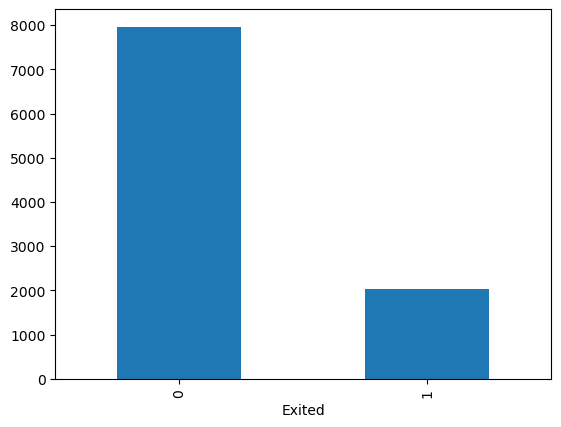

In [11]:
df['Exited'].value_counts(normalize=False).plot.bar();

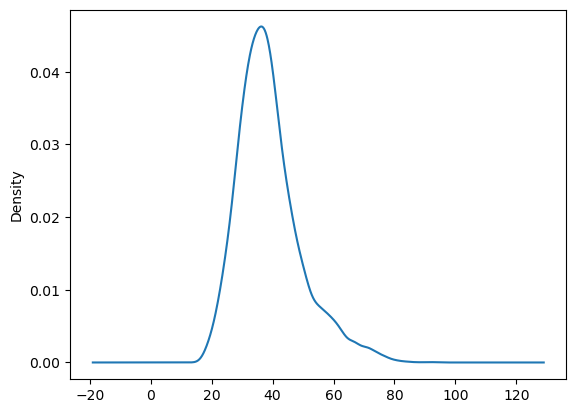

In [12]:
df['Age'].plot.density();

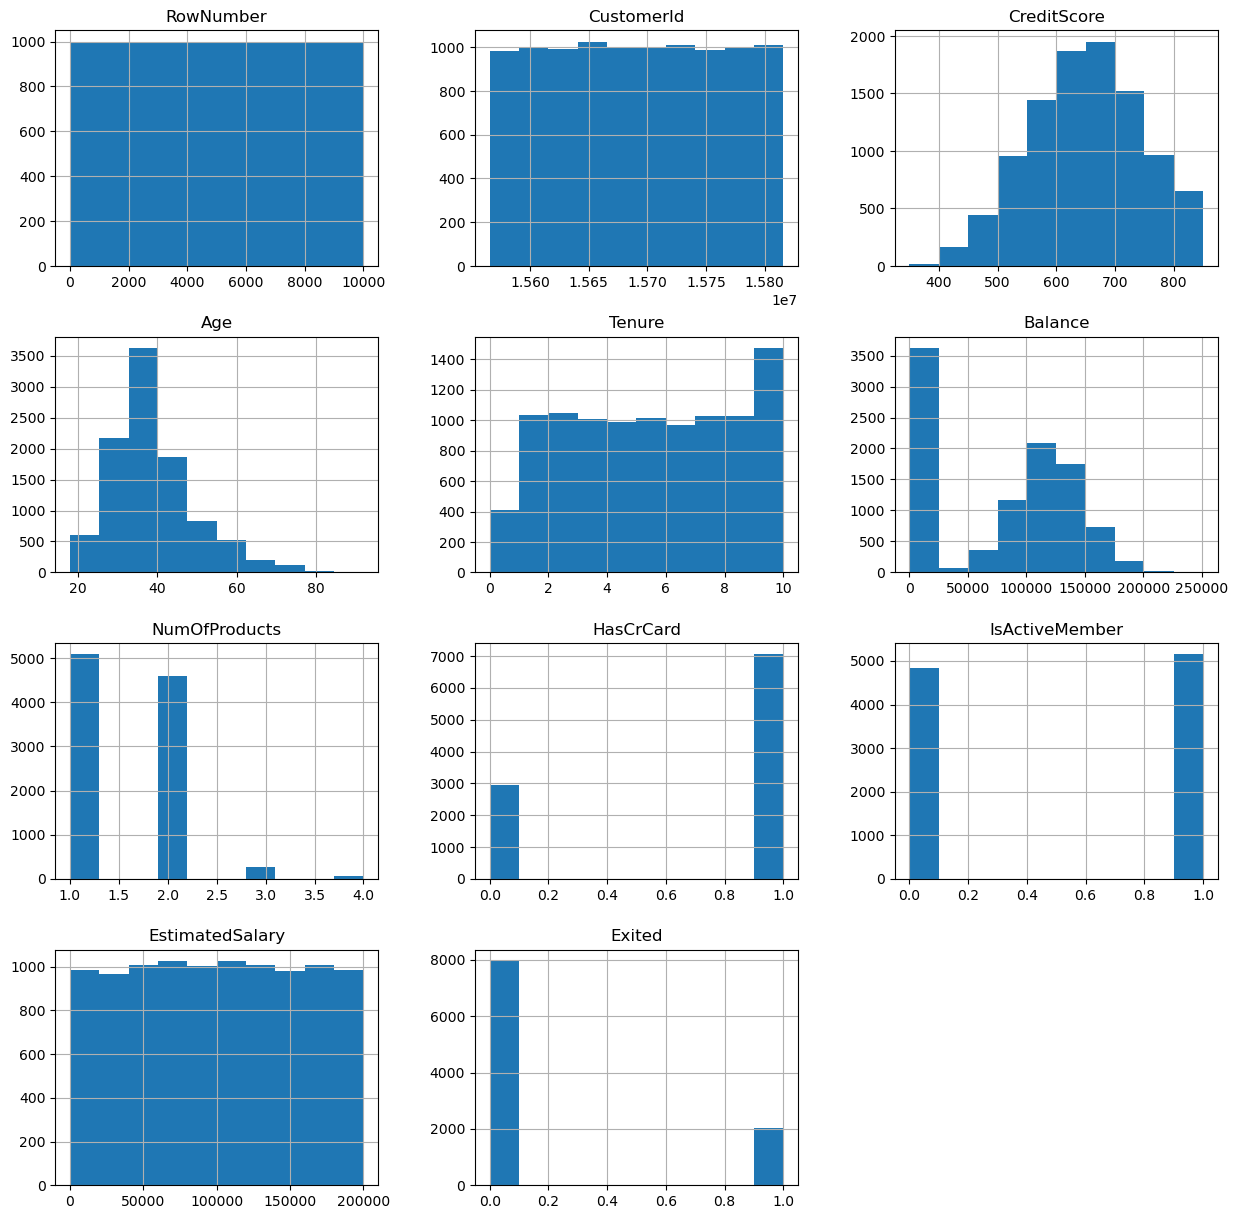

In [13]:
# гистаграммы всех признаков
df.hist(figsize=(15,15));

In [14]:
# список признаков для анализа
features_eda = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 
                  'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography']

In [15]:
df['Geography'] = df['Geography'].map({'France':0, 'Spain':1, 'Germany':2})

In [16]:
df['Gender'] = df['Gender'].map({'Male':0, 'Female':1})

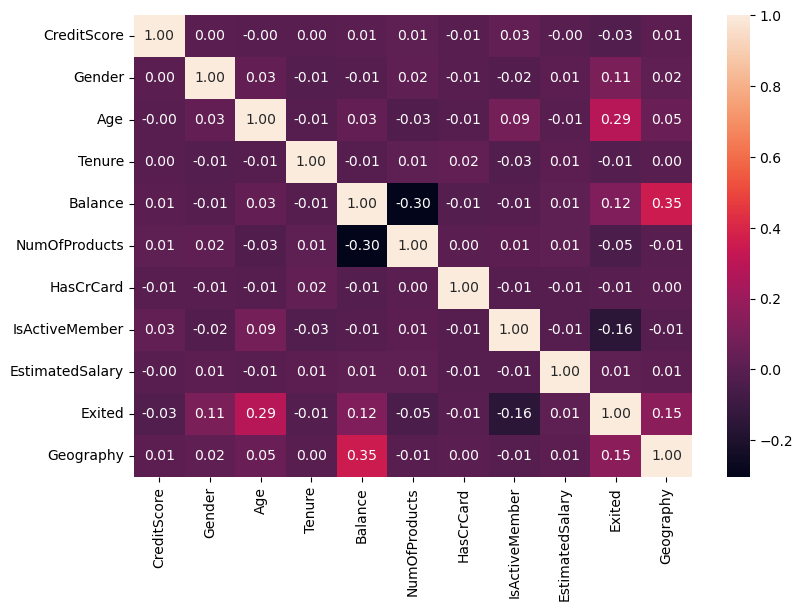

In [17]:
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(df[features_eda].corr(), annot = True, fmt = '.2f');

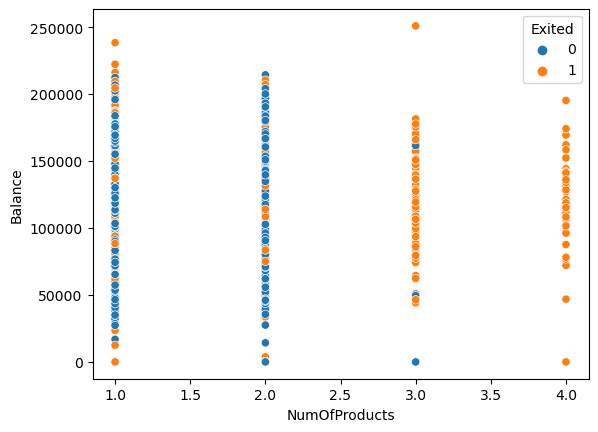

In [18]:
sns.scatterplot(data=df, x="NumOfProducts", y="Balance", hue="Exited");

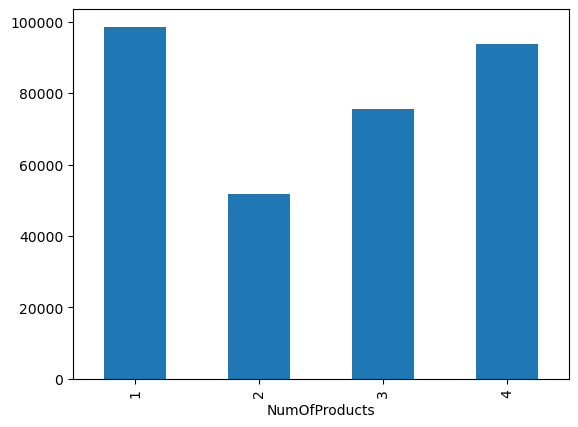

In [19]:
df.groupby('NumOfProducts')['Balance'].mean().plot.bar();

### Многомерный анализ признаков

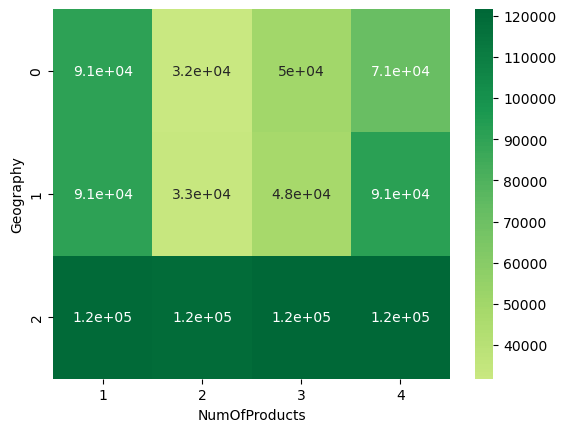

In [20]:
# тепловая карта баланса в разрезе стран и кол-ва продуктов
result = pd.pivot_table(data=df, index='Geography', columns='NumOfProducts', values='Balance')
sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()

## Предварительная обработка данных (preprocessing)

### Преобразование типов

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  int64  
 5   Gender           10000 non-null  int64  
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(11), object(1)
memory usage: 1.1+ MB


In [22]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,1,42,2,0.0000,1,1,1,101348.8800,1
1,2,15647311,Hill,608,1,1,41,1,83807.8600,1,0,1,112542.5800,0
2,3,15619304,Onio,502,0,1,42,8,159660.8000,3,1,0,113931.5700,1
3,4,15701354,Boni,699,0,1,39,1,0.0000,2,0,0,93826.6300,0
4,5,15737888,Mitchell,850,1,1,43,2,125510.8200,1,1,1,79084.1000,0
5,6,15574012,Chu,645,1,0,44,8,113755.7800,2,1,0,149756.7100,1
6,7,15592531,Bartlett,822,0,0,50,7,0.0000,2,1,1,10062.8000,0
7,8,15656148,Obinna,376,2,1,29,4,115046.7400,4,1,0,119346.8800,1
8,9,15792365,He,501,0,0,44,4,142051.0700,2,0,1,74940.5000,0
9,10,15592389,H?,684,0,0,27,2,134603.8800,1,1,1,71725.7300,0


### Преобразование небинарных категориальных признаков в набор фиктивных бинарных

In [23]:
# генерация бинарных колонок (фиктивных переменных) для категориального признака Geography
geography_cols = pd.get_dummies(df["Geography"], dtype=int)
geography_cols.rename(columns={ 0: "FromFrance", 1: "FromSpain", 2: "FromGermany" }, inplace=True)
geography_cols.head()

,FromFrance,FromSpain,FromGermany
0,1,0,0
1,0,1,0
2,1,0,0
3,1,0,0
4,0,1,0


### Формирование дата-сета для обучения моделей

In [24]:
# выделение целевой переменной в отдельный вектор
y = df['Exited']

In [25]:
# список имён признаков, которые будут использоваться для построения модели
features_names = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

In [26]:
# объединение изначальных признаков и фиктивных бинарных признаков - формирование матрицы Объекты-признаки
X = pd.concat([df[features_names], geography_cols], axis = 1)

### Масштабирование

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X.to_numpy())
X = pd.DataFrame(X, columns=features_names + ["FromFrance", "FromSpain", "FromGermany"])
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,FromFrance,FromSpain,FromGermany
0,0.5380,1.0000,0.3243,0.2000,0.0000,0.0000,1.0000,1.0000,0.5067,1.0000,0.0000,0.0000
1,0.5160,1.0000,0.3108,0.1000,0.3340,0.0000,0.0000,1.0000,0.5627,0.0000,1.0000,0.0000
2,0.3040,1.0000,0.3243,0.8000,0.6364,0.6667,1.0000,0.0000,0.5697,1.0000,0.0000,0.0000
3,0.6980,1.0000,0.2838,0.1000,0.0000,0.3333,0.0000,0.0000,0.4691,1.0000,0.0000,0.0000
4,1.0000,1.0000,0.3378,0.2000,0.5002,0.0000,1.0000,1.0000,0.3954,0.0000,1.0000,0.0000


### Создание моделей и прогнозирование

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [29]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6700, 12) (3300, 12) (6700,) (3300,)


### KNeighborsClassifier (Классификация ближайших соседей)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [31]:
%%time
knn = KNeighborsClassifier()
knn.fit(X_train, y_train);

CPU times: total: 15.6 ms
Wall time: 17 ms


In [32]:
knn_pred_test = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred_test, normalize=True)
print(f'test accuracy: {knn_accuracy}')

test accuracy: 0.8163636363636364


### Gaussian Naive Bayes (НАИВНЫЙ БАЙЕСОВСКИЙ КЛАССИФИКАТОР)

In [33]:
from sklearn.naive_bayes import GaussianNB

In [34]:
%%time
gnb = GaussianNB()
gnb.fit(X_train, y_train);

CPU times: total: 31.2 ms
Wall time: 3 ms


In [35]:
gnb_pred_test = gnb.predict(X_test)
gnb_accuracy = accuracy_score(y_test, gnb_pred_test)
print(f'test accuracy: {gnb_accuracy}')

test accuracy: 0.8209090909090909


### Random Forest Classifier (Классификатор дерева решений)

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
%%time
rfc  = RandomForestClassifier(criterion = 'gini',
                                    n_estimators = 100,
                                    max_depth = 9,
                                    random_state = 42,
                                    n_jobs = -1)

rfc.fit(X_train, y_train);

CPU times: total: 1.5 s
Wall time: 257 ms


In [38]:
rfc_pred_test = rfc.predict(X_test)
rfc_accuracy = accuracy_score(y_test, rfc_pred_test)
print(f'test accuracy: {rfc_accuracy}')

test accuracy: 0.8712121212121212


In [39]:
from sklearn.metrics import accuracy_score

### Logistic Regression (Логистическая регрессия)

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
%%time
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train);

CPU times: total: 31.2 ms
Wall time: 34 ms


In [42]:
lr_pred_test = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred_test)
print(f'test accuracy: {lr_accuracy}')

test accuracy: 0.813030303030303


## Метрики классификации

In [43]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix, r2_score
from sklearn.metrics import classification_report

In [44]:
log = pd.DataFrame(columns=["Classifier", "Accuracy"])
log["Classifier"] = ["KNeighborsClassifier", "Gaussian Naive Bayes", "Random Forest Classifier", "Logistic Regression"]
log["Accuracy"] = [knn_accuracy, gnb_accuracy, rfc_accuracy, lr_accuracy]
log

,Classifier,Accuracy
0,KNeighborsClassifier,0.8164
1,Gaussian Naive Bayes,0.8209
2,Random Forest Classifier,0.8712
3,Logistic Regression,0.8130


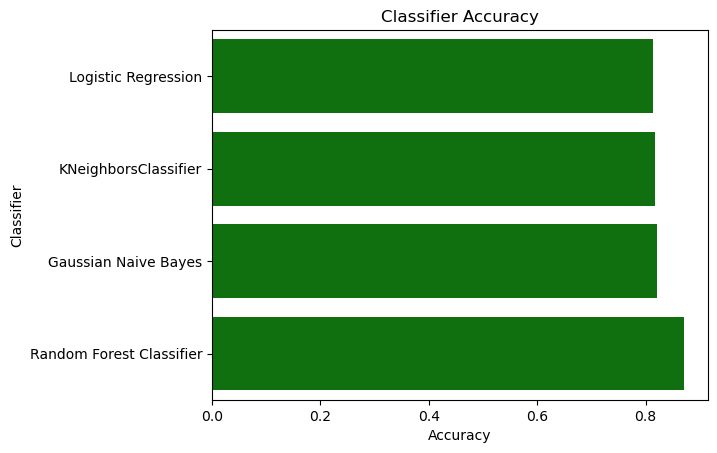

In [45]:
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')
sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values(by='Accuracy'), color="g");

In [46]:
y_train_predict = rfc.predict(X_train)
y_test_predict = rfc.predict(X_test)

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [48]:
cm = confusion_matrix(y_test, y_test_predict)

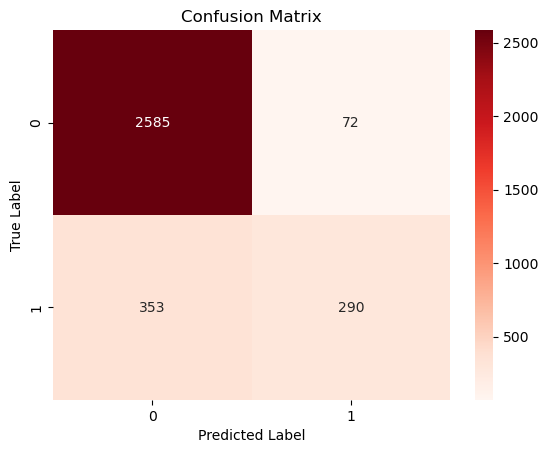

In [49]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### Accuracy (Точность)

In [50]:
print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, y_test_predict, normalize=True))

train accuracy:  0.8901492537313432
test accuracy:  0.8712121212121212


#### Precision (точность) 

In [51]:
print('test precision_score: ', precision_score(y_test, y_test_predict))

test precision_score:  0.8011049723756906


#### Recall (полнота)

In [52]:
print('test recall_score: ', recall_score(y_test, y_test_predict))

test recall_score:  0.4510108864696734


#### F1-score

In [53]:
print('test f1_score: ', f1_score(y_test, y_test_predict))

test f1_score:  0.5771144278606964


#### Полная информация

In [54]:
print(classification_report( y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2657
           1       0.80      0.45      0.58       643

    accuracy                           0.87      3300
   macro avg       0.84      0.71      0.75      3300
weighted avg       0.86      0.87      0.86      3300



#### ROC-кривая

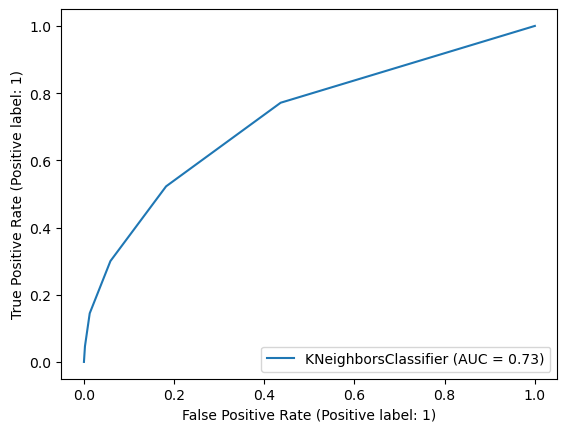

In [55]:
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(knn, X_test, y_test)

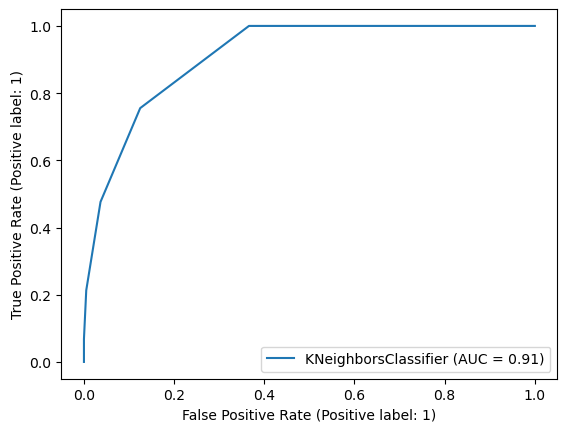

In [56]:
svc_disp = RocCurveDisplay.from_estimator(knn, X_train, y_train)

В ходе работы была выполнена классификация и масштабирование.

Была получена очень хорошая общую точность (accuracy) модели с помощю метода Random Forest равную ~0.871,
однако точность положительных предсказаний (precision) состовляет всего ~0.801.
Не смотря на хорошие показатели accuracy и precision, recall равняется ~0.451, что хуже случайного ответа,
из за этого f1 score оказался очень плохим, равным ~0.577.
ROC AUC равняется 0,91, что считается очень хорошим результатом.

__Данные knn:__
- (precision) состовляет всего ~0.553,
- однако посчитав полноту (recall), выяслилось, что она равна всего равна ~0.3.
- В итоге F1-score получился равный ~0.389, что делает модель бесполезной.

__Данные knn без масштабирования:__
- accuracy: ~0.871
- precision: ~0.255
- recall: ~0.096
- f1: ~0.14